### Kielder data summaries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

# Assume want both species of tick, only SV species of verterbrate
# Assume both tick sp are competent vectors for disease in question
# Therefore, one set of analyses per disease, both ticks for SV

df_SA_ricinus_trianguliceps = df[df["Species"] == "SA"]

# First, want to see coincident coaggregation

month = df_SA_ricinus_trianguliceps["Month"]
month_number = []
month_short = []
for one_month in month:
    month_number.append(datetime.strptime(one_month, "%B").strftime('%m'))
    month_short.append(datetime.strptime(one_month, "%B").strftime('%b'))

df_SA_ricinus_trianguliceps["month_number"] = month_number
df_SA_ricinus_trianguliceps["month_short"] = month_short

df_SA_ricinus_trianguliceps_larvae_summary = pd.pivot_table(df_SA_ricinus_trianguliceps,
                                                            index=["Year", "month_number", "month_short"],
                                                            #index=["Year", "Month"],
                                                            values=["Larvae", "Nymphs"],
                                                            aggfunc="sum").reset_index()


/tmp/ipykernel_53884/2866250332.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SA_ricinus_trianguliceps["month_number"] = month_number
/tmp/ipykernel_53884/2866250332.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SA_ricinus_trianguliceps["month_short"] = month_short


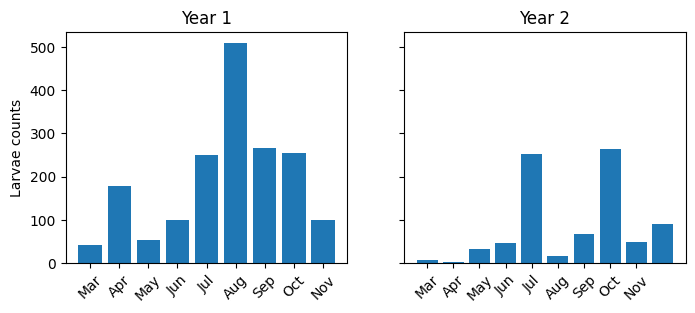

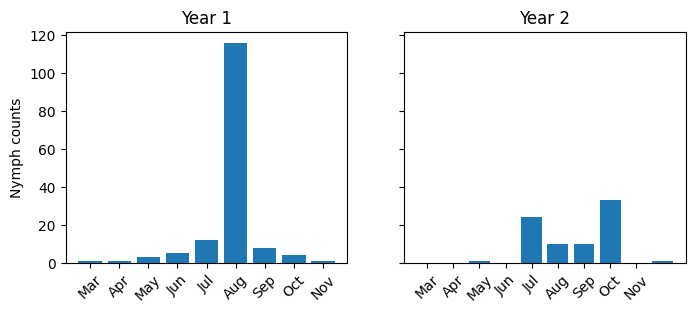

In [10]:
year_1 = df_SA_ricinus_trianguliceps_larvae_summary[df_SA_ricinus_trianguliceps_larvae_summary["Year"] == 1]
year_2 = df_SA_ricinus_trianguliceps_larvae_summary[df_SA_ricinus_trianguliceps_larvae_summary["Year"] == 2]

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharey=True)
axs[0].bar(year_1["month_short"], year_1["Larvae"])
axs[0].set_ylabel("Larvae counts")
axs[0].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=45, ha='center')
axs[0].set_title("Year 1")
axs[1].bar(year_2["month_short"], year_2["Larvae"])
axs[1].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=45, ha='center')
axs[1].set_title("Year 2")
plt.show()

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharey=True)
axs[0].bar(year_1["month_short"], year_1["Nymphs"])
axs[0].set_ylabel("Nymph counts")
axs[0].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=45, ha='center')
axs[0].set_title("Year 1")
axs[1].bar(year_2["month_short"], year_2["Nymphs"])
axs[1].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=45, ha='center')
axs[1].set_title("Year 2")
plt.show()

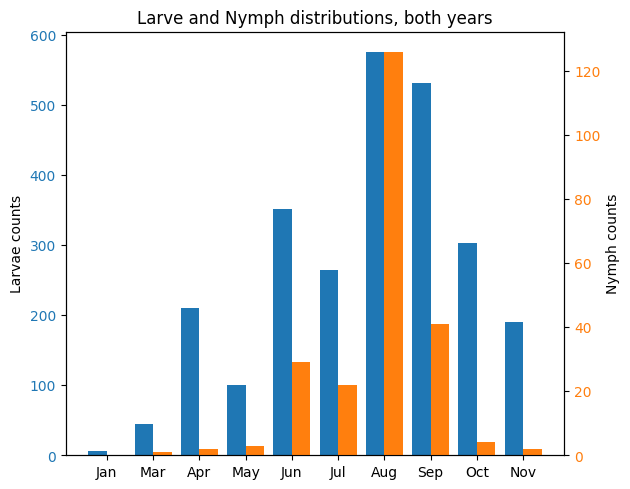

In [11]:
df_SA_ricinus_trianguliceps_larvae_summary = pd.pivot_table(df_SA_ricinus_trianguliceps,
                                                            index=["month_number", "month_short"],
                                                            #index=["Year", "Month"],
                                                            values=["Larvae", "Nymphs"],
                                                            aggfunc="sum").reset_index()

width=0.4

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x=np.arange(len(df_SA_ricinus_trianguliceps_larvae_summary["month_short"]))

ax1.bar(x-width/2,
        df_SA_ricinus_trianguliceps_larvae_summary["Larvae"],
        width=width,
        color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylabel("Larvae counts")
ax1.set_xticks(x, df_SA_ricinus_trianguliceps_larvae_summary["month_short"])

ax2.bar(x+width/2,
        df_SA_ricinus_trianguliceps_larvae_summary["Nymphs"],
        width=width,
        color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.set_ylabel("Nymph counts")

fig.tight_layout()
plt.title("Larve and Nymph distributions, both years")
plt.show()

